## Creating the Dataset and Finding the vandermonde matrix



(100,)
(70,) (30,) (70,) (30,)


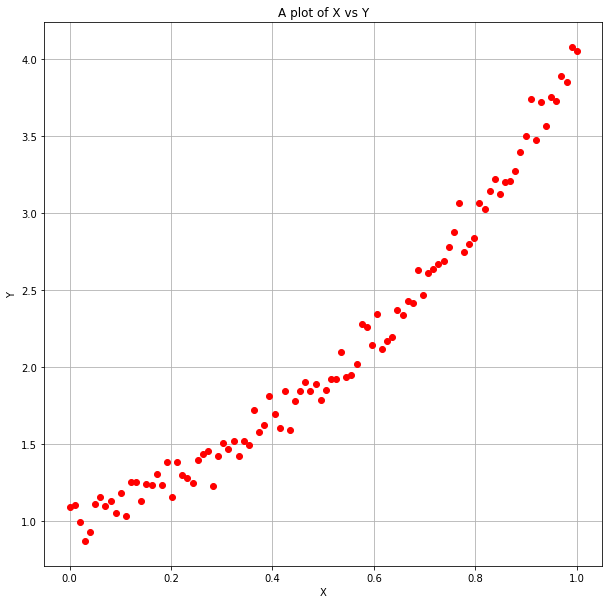

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

#create vandermonde matrix
def vander(X,K):
    
#     N=len(X)
#     a=range(1,N+1)#or a=np.arange(1,N+1)
#     mat=np.array([a]*K).T**range(K)
#     return mat

    N=len(X)
    phi=np.zeros((N,K))
    for j in range(K):
        phi[:,j]=X**j
    #print(phi)    
    return phi

#create a test problem

N=100 #no of data points
K=4 # correct degree of polynomial

#define domain
a=0
b=1

#define true solution

theta_true=np.ones((K,))

#linspace of X in a,b
X=np.linspace(a,b,N)

# define Y such that theta_true is the solution of 
#phi(X)*theta=Y

phi=vander(X,K)
Y=phi@theta_true

#corrupt Y with noise

sigma=0.1 # variance of the noise
Y=Y+sigma*np.random.normal(0,1,Y.shape)

print(X.shape)

def split_data(X, Y, Ntrain):
    N = len(X)

    idx = np.arange(N)
    np.random.shuffle(idx)

    train_idx = idx[:Ntrain]
    test_idx = idx[Ntrain:]

    Xtrain = X[train_idx]
    Ytrain = Y[train_idx]
    
    Xtest = X[test_idx]
    Ytest = Y[test_idx]

    return (Xtrain, Ytrain), (Xtest, Ytest)

# Test it
(Xtrain, Ytrain), (Xtest, Ytest) = split_data(X, Y, 70)

print(Xtrain.shape, Xtest.shape, Ytrain.shape, Ytest.shape)
plt.figure(figsize=(10,10))
plt.plot(X, Y, 'o', color='red')
plt.title('A plot of X vs Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.show()


## Finding the solution of Ɵ_MLE

1. Taking as input the training data Xtrain, Ytrain and K, pretending not to know the correct value of K. It returns the MLE solution (with Gaussian assumption) θMLE ∈ R for that problem.

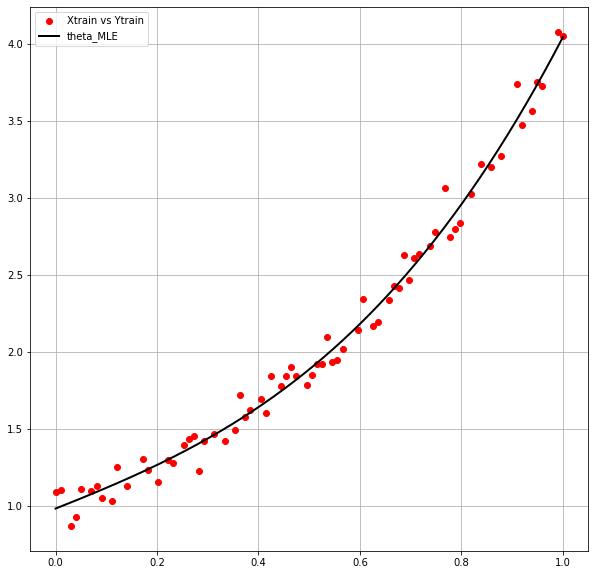

In [2]:
def MLE(Xtrain, Ytrain,K):
    
    phi_t=vander(Xtrain,K)

# Given Xtrain and Ytrain computing a solution theta_MLE

    theta_MLE=np.linalg.solve(phi_t.T@phi_t,phi_t.T@Ytrain)    # the equation is a solution of an equation and not an inverse

# Plotting f_theta(X) in the same plot of Xtrain and Ytrain 
# checking the approximation

    return theta_MLE
#calling function to solve MLE using any K
XX=np.linspace(a,b,1000)
    # computing Y on XX in YY
theta_MLE=MLE(Xtrain,Ytrain,4)
YY=vander(XX,4)@theta_MLE
plt.figure(figsize=(10,10))
plt.plot(Xtrain, Ytrain, 'o', color='red')
plt.plot(XX,YY,color='k', linewidth=2)  #plt.plot
plt.legend(['Xtrain vs Ytrain', 'theta_MLE'])
plt.grid()
plt.show()



2. the average absolute error of the polynomial regressor fθ(x) over Xtest, computed as:
   1/N_test=||fθ(Xtest) − Ytest||2

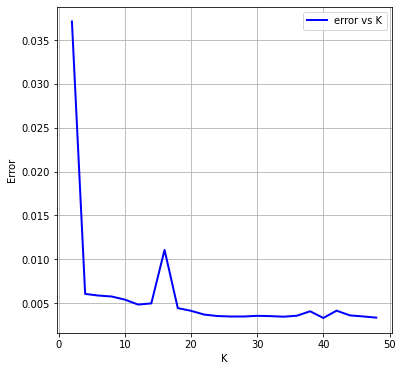

In [3]:
def MLE_err(Xtest, Ytest,K):
    
    phi_t=vander(Xtest,K)

# Given Xtrain and Ytrain computing a solution theta_MLE

    theta_MLE=np.linalg.solve(phi_t.T@phi_t,phi_t.T@Ytest)    # the equation is a solution of an equation and not an inverse

    #err=avg_abs_err(theta_MLE, Xtest, Ytest,K)
    #print(err)
    # Plotting f_theta(X) in the same plot of Xtrain and Ytrain 
# checking the approximation

    XX=np.linspace(a,b,1000)
    # computing Y on XX in YY
    YY=vander(XX,K)@theta_MLE

    return avg_abs_err(theta_MLE, Xtest, Ytest,K)

def avg_abs_err(theta_MLE, Xtest, Ytest,K):
    N_test=len(Xtest)
    v=vander(Xtest,K)
#     print("***")
#     print(np.power(np.linalg.norm(v@theta_MLE-Ytest),2)/N_test)
    return np.power(np.linalg.norm(v@theta_MLE-Ytest),2)/N_test

#calling function to solve MLE using any K for the testing dataset

err = np.empty(24)
k=np.arange(2,50,2)
#print(list(k))
for i in range(len(k)):
    err[i]=MLE_err(Xtest,Ytest,k[i])
    
plt.figure(figsize=(6,6))
plt.plot(k,err,color='b', linewidth=2)
plt.legend(['error vs K'])
plt.xlabel('K')
plt.ylabel('Error')
plt.grid()
plt.show()




3. For different values of K, plotting the training datapoints and the test datapoints with different colors, and visualizing (as a continuous line) the learnt regression model fθMLE (x).

-> For low K, it gives a straight line showing that the model cannot capture the complexity of the data, i.e the curve is **underfitted**
-> For high K, the wavy lines depicts that it is too flexible thus including noise, i.e the curve is **overfitted**

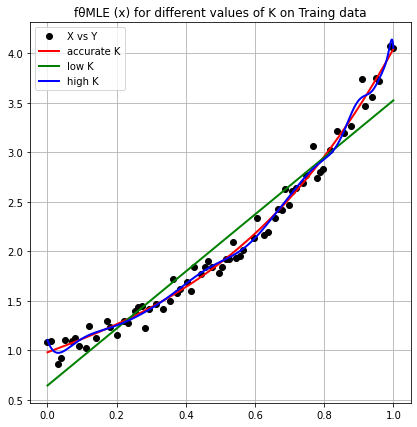

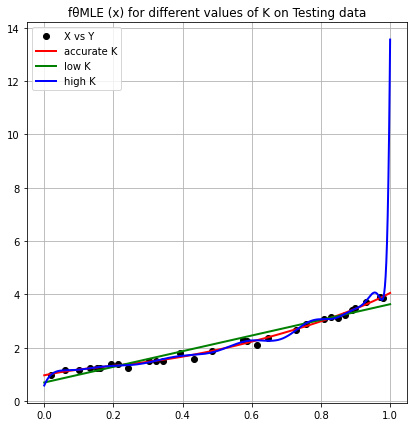

In [4]:
 # create figure on training and testing data    
YY_1=vander(XX,4)@MLE(Xtrain,Ytrain,4)
YY_2=vander(XX,2)@MLE(Xtrain,Ytrain,2)
YY_3=vander(XX,50)@MLE(Xtrain,Ytrain,50)

plt.figure(figsize=(15, 7))
# plot data on new axis
XX=np.linspace(a,b,1000)
plt.subplot(1, 2, 1)
plt.plot(Xtrain, Ytrain, 'o', color='black')
plt.plot(XX,YY_1, color='red',linewidth=2)
plt.plot(XX,YY_2, color='green',linewidth=2)
plt.plot(XX,YY_3, color='blue',linewidth=2)
plt.title('fθMLE (x) for different values of K on Traing data')

plt.legend(['X vs Y', 'accurate K','low K','high K'])
plt.grid()
#plt.show()

Y_1=vander(XX,6)@MLE(Xtest,Ytest,6)
Y_2=vander(XX,2)@MLE(Xtest,Ytest,2)
Y_3=vander(XX,35)@MLE(Xtest,Ytest,35)


plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 2)
plt.plot(Xtest, Ytest, 'o', color='black')
plt.plot(XX,Y_1, color='red',linewidth=2)
plt.plot(XX,Y_2, color='green',linewidth=2)
plt.plot(XX,Y_3, color='blue',linewidth=2)
plt.title('fθMLE (x) for different values of K on Testing data')
#ax.set_yscale('log')
# add legend
plt.legend(['X vs Y', 'accurate K','low K','high K'])
plt.grid()

# display plot
plt.show()

4. Computing the training and test error, where the test set is generated by sampling Ntest new points on the same interval [a, b] of the training set and generating the corresponding Ytest with the same procedure of the training set. Plotting the two errors with respect to K.

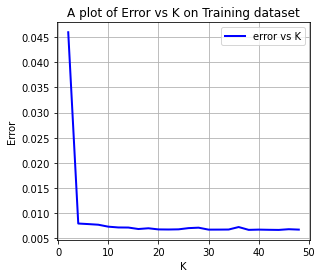

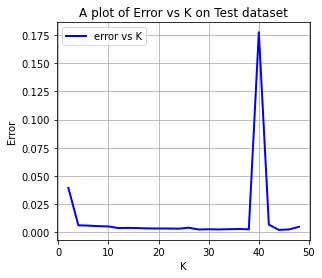

In [5]:
def MLE_err(Xtest, Ytest,K):
    
    phi_t=vander(Xtest,K)

# Given Xtrain and Ytrain computing a solution theta_MLE

    theta_MLE=np.linalg.solve(phi_t.T@phi_t,phi_t.T@Ytest)    # the equation is a solution of an equation and not an inverse

    return avg_abs_err(theta_MLE, Xtest, Ytest,K)

# Calculating optimization error
def avg_abs_err(theta, Xtest, Ytest,K):
    N_test=len(Xtest)
    v=vander(Xtest,K)

    return np.power(np.linalg.norm(v@theta-Ytest),2)/N_test

#calling function to solve MLE using a range of increasing K for the training dataset

err_train = np.empty(24)
k=np.arange(2,50,2)
#print(list(k))
for i in range(len(k)):
    err_train[i]=MLE_err(Xtrain,Ytrain,k[i])

plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
plt.plot(k,err_train,color='b', linewidth=2)
plt.title('A plot of Error vs K on Training dataset')
plt.legend(['error vs K', 'theta_MLE'])
plt.xlabel('K')
plt.ylabel('Error')
plt.grid()

# generating new test data points by sampling Ntest over [a,b]
N_test=len(Xtest)
Xt=np.linspace(a,b,N_test)
# computing Y on XX in YY
Yt=vander(Xt,4)@theta_true

#corrupt Y with noise

sigma=0.1 # variance of the noise
Yt=Yt+sigma*np.random.normal(0,1,Yt.shape)

err_test = np.empty(24)

#calling function to solve MLE using a range of increasing K for the new testing dataset
for i in range(len(k)):
    err_test[i]=MLE_err(Xt,Yt,k[i])
    
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 2)
plt.plot(k,err_test,color='b', linewidth=2)
plt.title('A plot of Error vs K on Test dataset')
plt.legend(['error vs K', 'theta_MLE'])
plt.xlabel('K')
plt.ylabel('Error')
plt.grid()
plt.show()


5. Taking as input the training data Xtrain, Ytrain, K and λ > 0, pretending not to know the correct value of K. It returns the MAP solution (with Gaussian assumption) θMAP ∈ R for that problem.

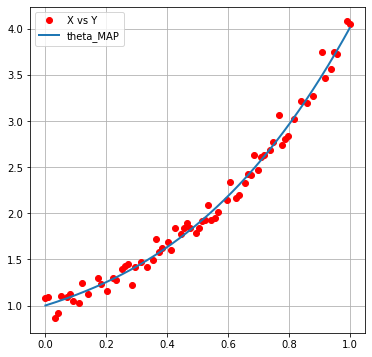

In [6]:
## Given X and Y compute a solution theta_MAP

def MAP(Xtrain, Ytrain,K,lamda):
# X and Y are fixed

# set lambda (do not call parameter lambda)

    #lamda=0.1

    # Compute the vandermonde for the problem
    phi_MAP=vander(Xtrain,K)

    # Solve theta_MAP

    theta_MAP=np.linalg.solve(phi_MAP.T@phi_MAP+lamda*np.identity(K),phi_MAP.T@Ytrain)
    return theta_MAP

# Visualize
# set K_trial
K_trial=4
lamda=0.1
XX=np.linspace(a,b,1000)
YY_trial=vander(XX,K_trial)@MAP(Xtrain, Ytrain,K_trial,lamda)
plt.figure(figsize=(6,6))
plt.plot(Xtrain, Ytrain, 'o', color='red')
#plt.plot(XX,YY,color='k', linewidth=3)  #plt.plot

plt.plot(XX,YY_trial,linewidth=2 )

plt.legend(['X vs Y', 'theta_MAP'])
plt.grid()
plt.show()

6. For different values of K, plotting the training datapoints and the test datapoints with different colors, and visualizing (as a continuous line) the learnt regression model fθMAP (x).

-> For low K and high value of λ, it gives a straight line showing that the model cannot capture the complexity of the data, i.e the curve is **underfitted**
-> For high K and low value of λ, the wavy lines depicts that it is too flexible thus including noise, i.e the curve is **overfitted**

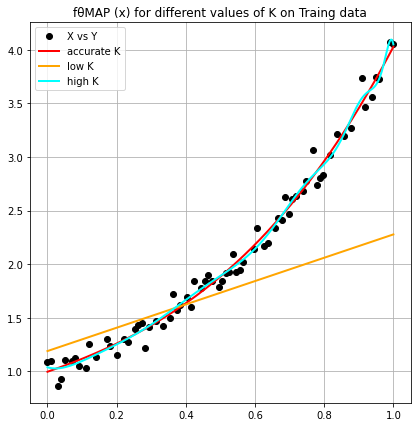

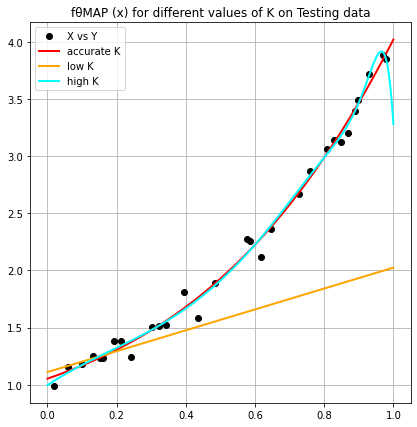

In [7]:
 # create figure on training and testing data    
YY_1=vander(XX,4)@MAP(Xtrain,Ytrain,4,0.01)
YY_2=vander(XX,2)@MAP(Xtrain,Ytrain,2,20)
YY_3=vander(XX,55)@MAP(Xtrain,Ytrain,55,0.00000001)

plt.figure(figsize=(15, 7))
# plot data on new axis
XX=np.linspace(a,b,1000)
plt.subplot(1, 2, 1)
plt.plot(Xtrain, Ytrain, 'o', color='black')
plt.plot(XX,YY_1, color='red',linewidth=2)
plt.plot(XX,YY_2, color='orange',linewidth=2)
plt.plot(XX,YY_3, color='cyan',linewidth=2)
plt.title('fθMAP (x) for different values of K on Traing data')

plt.legend(['X vs Y', 'accurate K','low K','high K'])
plt.grid()
#plt.show()

Y_1=vander(XX,4)@MAP(Xtest,Ytest,4,0.01)
Y_2=vander(XX,2)@MAP(Xtest,Ytest,2,17)
Y_3=vander(XX,43)@MAP(Xtest,Ytest,43,0.00001)


plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 2)
plt.plot(Xtest, Ytest, 'o', color='black')
plt.plot(XX,Y_1, color='red',linewidth=2)
plt.plot(XX,Y_2, color='orange',linewidth=2)
plt.plot(XX,Y_3, color='cyan',linewidth=2)
plt.title('fθMAP (x) for different values of K on Testing data')
#ax.set_yscale('log')
# add legend
plt.legend(['X vs Y', 'accurate K','low K','high K'])
plt.grid()

# display plot
plt.show()

7. For K being way greater than the correct degree of the polynomial, compute the MLE and MAP solution. Compare the test error of the two, for different values of λ (in the case of MAP).


In [8]:
K_large=75
lamda=0.00001
err_MLE=MLE_err(Xtest,Ytest,K_large)
theta_MAP=MAP(Xtest,Ytest,K_large,lamda)
err_MAP=avg_abs_err(theta_MAP, Xtest, Ytest,K_large)

print("MLE error | vs | MAP error")
print("----------|----|----------")
print(round(err_MLE,7),"|    |",round(err_MAP,7))

MLE error | vs | MAP error
----------|----|----------
0.0036317 |    | 0.0050633


MLE err =  [52399.599672603304, 37052.112368710244, 30252.92112020129, 26199.813123759803, 52399.599672603304, 37052.112368710244, 30252.92112020129, 26199.813123759803, 52399.599672603304, 37052.112368710244, 30252.92112020129, 26199.813123759803, 52399.599672603304, 37052.112368710244, 30252.92112020129, 26199.813123759803, 52399.599672603304, 37052.112368710244, 30252.92112020129, 26199.813123759803, 52399.599672603304, 37052.112368710244, 30252.92112020129, 26199.813123759803, 52399.599672603304, 37052.112368710244, 30252.92112020129, 26199.813123759803, 52399.599672603304, 37052.112368710244, 30252.92112020129, 26199.813123759803, 52399.599672603304, 37052.112368710244, 30252.92112020129, 26199.813123759803, 52399.599672603304, 37052.112368710244, 30252.92112020129, 26199.813123759803]
MAP err =  [1.2129178760477703, 1.4684108965050096, 1.032553790567915, 1.2129178760477703, 1.4684108965050096, 1.032553790567915, 1.2129178760477703, 1.4684108965050096, 1.032553790567915, 1.2129178

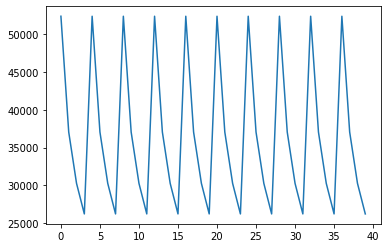

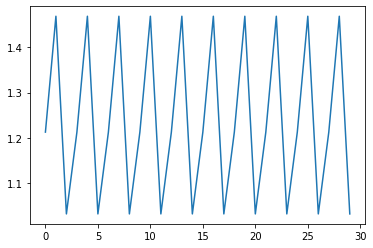

In [9]:
# for K greater than the correct test polynomial degree, define err(theta) as norm(theta-theta_true)/norm(theta_true),
# where theta_true has been padded with zeros to have the same dimension as theta. Compute the err(theta) for the
# MLE and MAP solutions for different values of lambda in the MAP solution
k_true=4
MLE_err = []
MAP_err = []
for k in range(1, 11):
    # pad theta_true with zeros to have the same dimension as theta_MLE but withouth replacing the first k elements
    theta_MLE=MLE(Xtrain,Ytrain,10)
    theta_MAP=MAP(Xtrain,Ytrain,10,0.1)
    theta_true_padded = np.zeros(len(theta_MLE))
    for i in range(k_true):
        theta_true_padded[i] = theta_true[i]
        MLE_err.append(np.linalg.norm(theta_MLE - theta_true_padded) / np.linalg.norm(theta_true_padded))
    for l in range(1, 4):
        MAP_err.append(np.linalg.norm(theta_MAP[l - 1] - theta_true_padded) / np.linalg.norm(theta_true_padded))
# print the err(theta) for the MLE and MAP solutions
print("MLE err = ", MLE_err)
print("MAP err = ", MAP_err)

plt.plot(MLE_err)
plt.show()
plt.plot(MAP_err)
plt.show()

8. setting yi as Poi(y| theta_true * xi + ... + theta_true * xi^(k-1) where Poi(y| lambda) is the Poisson distribution with parameter lambda.
reuse k_true, N and X from the previous exercise

Y with Poisson distribution =  [0. 1. 0. 2. 0. 4. 0. 0. 0. 1. 1. 0. 0. 2. 1. 2. 1. 2. 0. 2. 1. 0. 0. 0.
 0. 1. 2. 2. 0. 1. 0. 0. 1. 0. 3. 0. 0. 3. 0. 1. 0. 1. 1. 1. 2. 1. 0. 0.
 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 2. 1. 1. 0. 1. 0. 2. 3. 0. 3. 1. 1. 2. 1.
 0. 1. 1. 3. 0. 2. 0. 2. 0. 1. 2. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 3. 1.
 0. 2. 0. 3.]
MLE solution for Poisson distribution =  [ 0.85166948 -0.19899146  0.27863494  0.21573625]
MAP solution for Poisson distribution =  [ 0.83466727 -0.09609842  0.13064556  0.27236411]
Y with Poisson distribution =  [0. 1. 1. 0. 1. 1. 2. 2. 0. 0. 0. 0. 1. 0. 4. 1. 0. 0. 2. 3. 1. 1. 2. 1.
 0. 1. 1. 1. 2. 2. 3. 1. 0. 0. 1. 1. 1. 2. 1. 1. 3. 1. 1. 0. 1. 1. 1. 0.
 1. 0. 2. 2. 3. 0. 0. 1. 1. 0. 1. 0. 2. 1. 3. 2. 0. 0. 2. 5. 0. 1. 0. 2.
 0. 0. 2. 1. 0. 2. 0. 1. 1. 0. 0. 1. 0. 1. 1. 4. 2. 0. 1. 1. 2. 0. 1. 1.
 1. 0. 2. 1.]
MLE solution for Poisson distribution =  [ 0.62888307  3.86484161 -7.99434436  4.62106683]


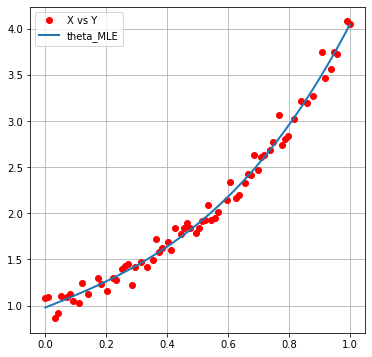

MAP solution for Poisson distribution =  [ 0.89709852  0.85047183 -0.83447761  0.02507674]


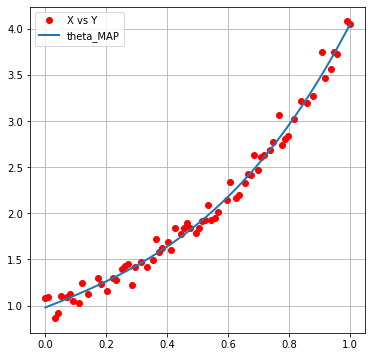

In [16]:
k_true=4
Y = np.zeros(N)
for i in range(N):
    lambda_poiss = 0
    for j in range(k_true):
        lambda_poiss += theta_true[j] * X[j]**j
    Y[i] = np.random.poisson(lambda_poiss)
D = (X, Y)
print("Y with Poisson distribution = ", Y)

# compute the MLE solution for the Poisson distribution
theta_MLE = MLE(X,Y, k_true)
print("MLE solution for Poisson distribution = ", theta_MLE)
# compute the MAP solution for the Poisson distribution
theta_MAP = MAP(X,Y, k_true, 0.1)
print("MAP solution for Poisson distribution = ", theta_MAP)


# repeat the same steps as in the previous exercise for the Poisson distribution
Y = np.zeros(N)
for i in range(N):
    lambda_poiss = 0
    for j in range(k_true):
        lambda_poiss += theta_true[j] * X[j]**j
    Y[i] = np.random.poisson(lambda_poiss)
D = (X, Y)
print("Y with Poisson distribution = ", Y)


theta_MLE = MLE(X,Y, k_true)
print("MLE solution for Poisson distribution = ", theta_MLE)
YY_trial=vander(XX,K_trial)@MLE(Xtrain,Ytrain, k_true)
plt.figure(figsize=(6,6))
plt.plot(Xtrain, Ytrain, 'o', color='red')
#plt.plot(XX,YY,color='k', linewidth=3)  #plt.plot

plt.plot(XX,YY_trial,linewidth=2 )

plt.legend(['X vs Y', 'theta_MLE'])
plt.grid()
plt.show()
# compute the MAP solution for the Poisson distribution
theta_MAP = MAP(X,Y, k_true, 0.1)
print("MAP solution for Poisson distribution = ", theta_MAP)
YY_trial=vander(XX,K_trial)@MAP(Xtrain, Ytrain,K_trial,lamda)
plt.figure(figsize=(6,6))
plt.plot(Xtrain, Ytrain, 'o', color='red')
#plt.plot(XX,YY,color='k', linewidth=3)  #plt.plot

plt.plot(XX,YY_trial,linewidth=2 )

plt.legend(['X vs Y', 'theta_MAP'])
plt.grid()
plt.show()

## optimization by GD, SGD or Normal Equations.

In [11]:
var=0.1

def phi(X, K):
    N = len(X)
    V = np.zeros((N, K))
    for i in range(K):
        V[:,i] = X**i
    return V

def ell(theta, K, X, Y):
    return 0.5 * (np.linalg.norm(phi(X, K)@theta - Y)**2)

def grad_ell(theta, K, X, Y):
    return phi(X, K).T @ (((phi(X, K))@theta) - Y)
def ell_map(lam):
    return lambda theta, K, X, Y: 0.5 * ((np.linalg.norm(phi(X, K)@theta - Y)**2) + (lam/2) * np.linalg.norm(theta)**2)

def grad_ell_map(lam):
    return lambda theta, K, X, Y: phi(X, K).T @ ((phi(X, K) @ theta) - Y) + 2 * lam * theta

def x_split(X, Y, N_train):
    N = len(X)

    idx = np.arange(N)
    np.random.shuffle(idx)

    train_idx = idx[:N_train]
    test_idx = idx[N_train:]

    Xtrain = X[train_idx]
    Ytrain = Y[train_idx]

    Xtest = X[test_idx]
    Ytest = Y[test_idx]

    return Xtrain, Xtest, Ytrain, Ytest

def theta_calc_eq(phi_X, Y):
    first_fact = phi_X.T @ phi_X
    second_fact = phi_X.T @ Y
    try:
        L = scipy.linalg.choleksy(first_fact, lower = True)
        y = scipy.linalg.solve_triangular(L, b, lower = True)
        theta_found_normeq = scipy.linalg.solve_triangular(L.T, y)
    except:
        theta_found_normeq = np.linalg.solve(first_fact, second_fact)
    return theta_found_normeq
def theta_calc_eq_map(phi_X, Y, lam, K):
    first_fact = np.linalg.inv(phi_X.T @ phi_X + (lam * np.eye(K)))
    second_fact = phi_X.T @ Y
    return first_fact @ second_fact

def GD(t0, D, K, tolf=1e-6, tolx=1e-6, kmax=1000, alpha=1e-2, f=ell, grad_f=grad_ell):
    (X, Y) = D

    tk = t0
    f_vals = [f(tk, K, X, Y)]
    grad_vals = [grad_f(tk, K, X, Y)]
    err_vals = [np.linalg.norm(grad_f(tk, K, X, Y))]
    t_vals = [tk]
    iteration = 0

    while iteration < kmax:
        t_prec = tk

        tk = t_prec - (alpha*grad_f(t_prec, K, X, Y))

        t_vals.append(tk)
        f_vals.append(f(tk, K, X, Y))
        grad_vals.append(grad_f(tk, K, X, Y))       
        err_vals.append(np.linalg.norm(grad_f(tk, K, X, Y)))

        iteration+=1

        if np.linalg.norm(grad_f(tk, K, X, Y)) < tolf:
            break

        if np.linalg.norm(tk - t_prec, 2) < tolx:
            break

    return tk

def SGD(t0, D, K, batch_size = 5, n_epochs = 10, alpha=1e-5, l=ell, grad_l=grad_ell):
    (X, Y) = D
    N = len(X)
    
    X_backup = X
    Y_backup = Y


    n_batch_per_epoch = N // batch_size
    t_vals = [t0]
    f_vals = [l(t0, K, X, Y)]
    grad_f_vals = [grad_l(t0, K, X, Y)]
    err_vals = [np.linalg.norm(grad_l(t0, K, X, Y))]

    for epoch in range(n_epochs):
        idx = np.arange(N)
        np.random.shuffle(idx)

        for k in range(n_batch_per_epoch):
            batch_indices = idx[k * batch_size : (k + 1) * batch_size]

            Mx = X[batch_indices]
            My = Y[batch_indices]

            t = t_vals[-1] - alpha * grad_l(t_vals[-1], K, Mx, My)
            t_vals.append(t)

        
        X = X_backup
        Y = Y_backup
        f_vals.append(l(t, K, X, Y))
        grad_f_vals.append(grad_l(t, K, X, Y))
        err_vals.append(np.linalg.norm(grad_l(t, K, X, Y)))

    return t_vals[-1]

def create_set(K=K, N=N, a=a, b=b):    
    X = np.linspace(a, b, N)
    theta_true = np.ones((K,))

    e = np.random.normal(0, var, N)

    Y = phi(X, K) @ theta_true + e

    N_train = int(N/3*2)
    X_train, X_test, Y_train, Y_test = x_split(X, Y, N_train)

    return X_train, X_test, Y_train, Y_test

X_train, X_test, Y_train, Y_test = create_set()
D = (X_train, Y_train)

def MLE_new(K, theta_calc, D):

    (X, Y) = D
    theta_found = None

    if theta_calc == "NE":
        theta_found = theta_calc_eq(phi(X, K), Y)
    elif theta_calc == "GD":
        theta_zero_1 = np.zeros((K,))
        theta_found = GD(theta_zero_1, D, K)
    elif theta_calc == "SGD":
        theta_zero_1 = np.random.normal(1, var, K)
        theta_found = SGD(theta_zero_1, D, K)

    return theta_found

def MAP_new(K, theta_calc, D, lam = 1):

    (X, Y) = D
    theta_found = None

    if theta_calc == "NE":
        theta_found = theta_calc_eq_map(phi(X, K), Y, lam, K)
    elif theta_calc == "GD":
        theta_zero_1 = np.zeros((K,))
        theta_found = GD(theta_zero_1, D, K, f=ell_map(lam), grad_f=grad_ell_map(lam))
    elif theta_calc == "SGD":
        theta_zero_1 = np.random.normal(1, var, K)
        theta_found = SGD(theta_zero_1, D, K, l=ell_map(lam), grad_l = grad_ell_map(lam))

    return theta_found

In [12]:
k0=10

def fixed_f(X, K, theta_found):
    return phi(X, K)@theta_found 

def avg_abs_err(theta_found, K, set):
    X, Y = set
    return ((np.linalg.norm(fixed_f(X, K, theta_found) - Y)**2) / len(X))
train_set = (X_train, Y_train)
test_set = (X_test, Y_test)

theta_neq_MLE = MLE_new(k0, "NE", D)
print("Normal Equation")
print("Average absolute error for K=" + str(k0) + ": " + str(avg_abs_err(theta_neq_MLE, k0, train_set)) + " on train set.")
print("Average absolute error for K=" + str(k0) + ": " + str(avg_abs_err(theta_neq_MLE, k0, test_set)) + " on test set.")

print("GD")
theta_gd_MLE= MLE_new(k0, "GD", D)
print("Average absolute error for K=" + str(k0) + ": " + str(avg_abs_err(theta_gd_MLE, k0, train_set)) + " on train set.")
print("Average absolute error for K=" + str(k0) + ": " + str(avg_abs_err(theta_gd_MLE, k0, test_set)) + " on test set.")

print("SGD")
theta_sgd_MLE= MLE_new(k0, "SGD", D)
print("Average absolute error for K=" + str(k0) + ": " + str(avg_abs_err(theta_sgd_MLE, k0, train_set)) + " on train set.")
print("Average absolute error for K=" + str(k0) + ": " + str(avg_abs_err(theta_sgd_MLE, k0, test_set)) + " on test set.")

Normal Equation
Average absolute error for K=10: 0.007695589885819572 on train set.
Average absolute error for K=10: 0.017926837694102554 on test set.
GD
Average absolute error for K=10: 0.008470819207528674 on train set.
Average absolute error for K=10: 0.015486918573589852 on test set.
SGD
Average absolute error for K=10: 2.771283689946877 on train set.
Average absolute error for K=10: 2.1916402863061535 on test set.


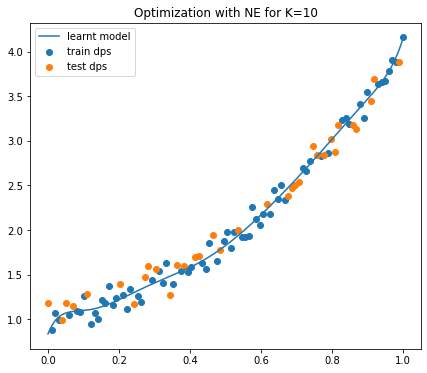

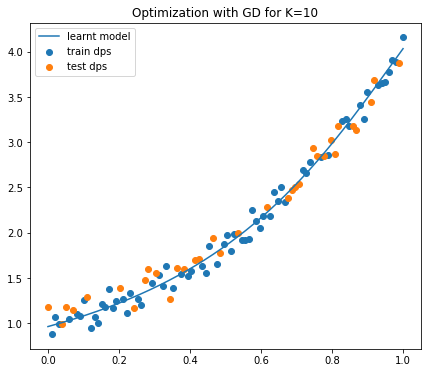

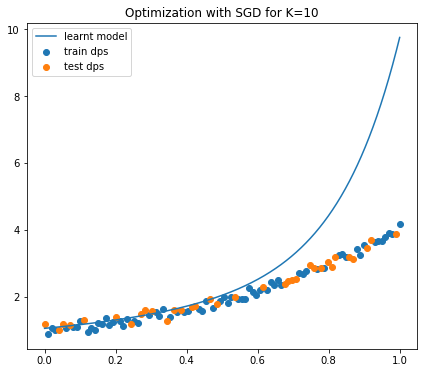

In [13]:
def plot_for_K(theta, K, method, a=a, b=b, var=var, X_train=X_train, Y_train=Y_train, X_test=X_test, Y_test=Y_test):
    fig, ax = plt.subplots(1, figsize = (7, 6))
    x_to_plot = np.linspace(a, b, 1000)
    y_to_plot = fixed_f(x_to_plot, K, theta)
    
    ax.plot(x_to_plot, y_to_plot, label="learnt model")

    ax.scatter(X_train, Y_train, label="train dps")
    ax.scatter(X_test, Y_test, label="test dps")


 
    plt.title("Optimization with "+ method+ " for K="+str(K))
    plt.legend(loc="upper left")
    plt.show()
plot_for_K(theta_neq_MLE, k0, "NE")
plot_for_K(theta_gd_MLE, k0, "GD")
plot_for_K(theta_sgd_MLE, k0, "SGD")

In [14]:
lams = [1, 3, 5]

theta_neq_MAP = MAP_new(k0, "NE", D, lam=lams[0])
print("Normal Equation")
print("Average absolute error for K=" + str(k0) + ": " + str(avg_abs_err(theta_neq_MAP, k0, train_set)) + " on train set.")
print("Average absolute error for K=" + str(k0) + ": " + str(avg_abs_err(theta_neq_MAP, k0, test_set)) + " on test set.")

print("GD")
theta_gd_MAP = MAP_new(k0, "GD", D, lam=lams[1])
print("Average absolute error for K=" + str(k0) + ": " + str(avg_abs_err(theta_gd_MAP, k0, train_set)) + " on train set.")
print("Average absolute error for K=" + str(k0) + ": " + str(avg_abs_err(theta_gd_MAP, k0, test_set)) + " on test set.")

print("SGD")
theta_sgd_MAP = MAP_new(k0, "SGD", D, lam=lams[2])
print("Average absolute error for K=" + str(k0) + ": " + str(avg_abs_err(theta_sgd_MAP, k0, train_set)) + " on train set.")
print("Average absolute error for K=" + str(k0) + ": " + str(avg_abs_err(theta_sgd_MAP, k0, test_set)) + " on test set.")

Normal Equation
Average absolute error for K=10: 0.01154054956811704 on train set.
Average absolute error for K=10: 0.01753484817591837 on test set.
GD
Average absolute error for K=10: 0.035584650354333815 on train set.
Average absolute error for K=10: 0.04973771524799201 on test set.
SGD
Average absolute error for K=10: 2.927516046995456 on train set.
Average absolute error for K=10: 2.322461066503026 on test set.


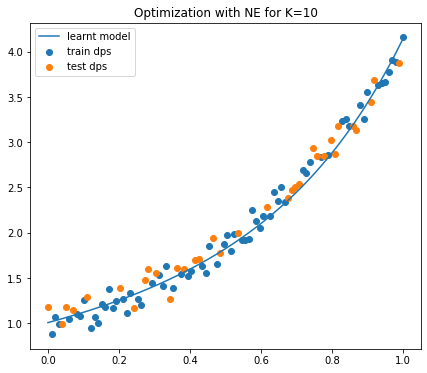

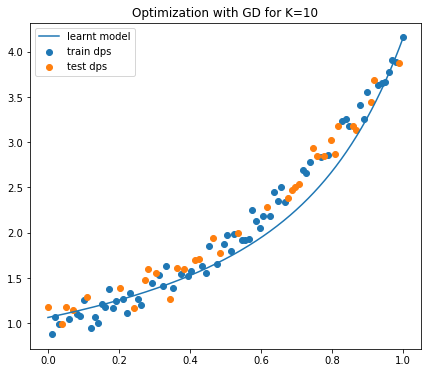

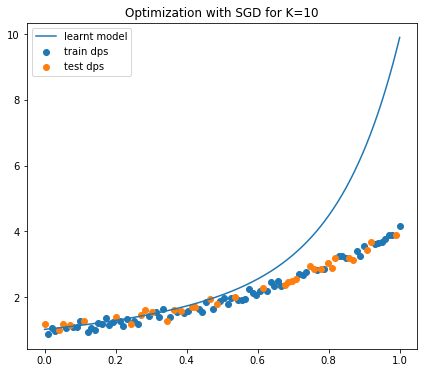

In [15]:
plot_for_K(theta_neq_MAP, k0, "NE")
plot_for_K(theta_gd_MAP, k0, "GD")
plot_for_K(theta_sgd_MAP, k0, "SGD")